In [ ]:
# О наборе данных - https://www.kaggle.com/datasets/nimapourmoradi/steel-dataset
# Дополнительная информация

# Собранная информация получена от компании DAEWOO Steel Co. Ltd в Кванъяне, Южная Корея. Он производит несколько типов рулонов,
# стальных листов и железных пластин. Информация о потреблении электроэнергии хранится в облачной системе.
# Целевой признак - Load_Type - тип загрузки металла (легкий, средний, тяжелый)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("Steel_industry.csv")
df

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [ ]:
df = df.drop(['Date_Time', 'WeekStatus', 'Day_Of_Week'], axis=1)
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Light_Load
...,...,...,...,...,...,...,...,...
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Light_Load
35039,3.67,3.02,0.07,0.0,77.22,99.98,0,Light_Load


In [ ]:
df['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Light_Load
...,...,...,...,...,...,...,...,...
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Light_Load
35039,3.67,3.02,0.07,0.0,77.22,99.98,0,Light_Load


In [ ]:
# Перед тем как визуализировать данные - посмотреть зависимость целевой переменной от признаков в наборе, преобразуем целевую переменную
encoder = LabelEncoder()
df['Load_Type'] = encoder.fit_transform(df['Load_Type'])


<ipython-input-7-d627e41c229a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Load_Type'] = encoder.fit_transform(df['Load_Type'])


In [ ]:
y = df['Load_Type']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34479 entries, 0 to 35040
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             34479 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  34479 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  34479 non-null  float64
 3   CO2(tCO2)                             34479 non-null  float64
 4   Lagging_Current_Power_Factor          34479 non-null  float64
 5   Leading_Current_Power_Factor          34479 non-null  float64
 6   NSM                                   34479 non-null  int64  
 7   Load_Type                             34479 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 2.4 MB


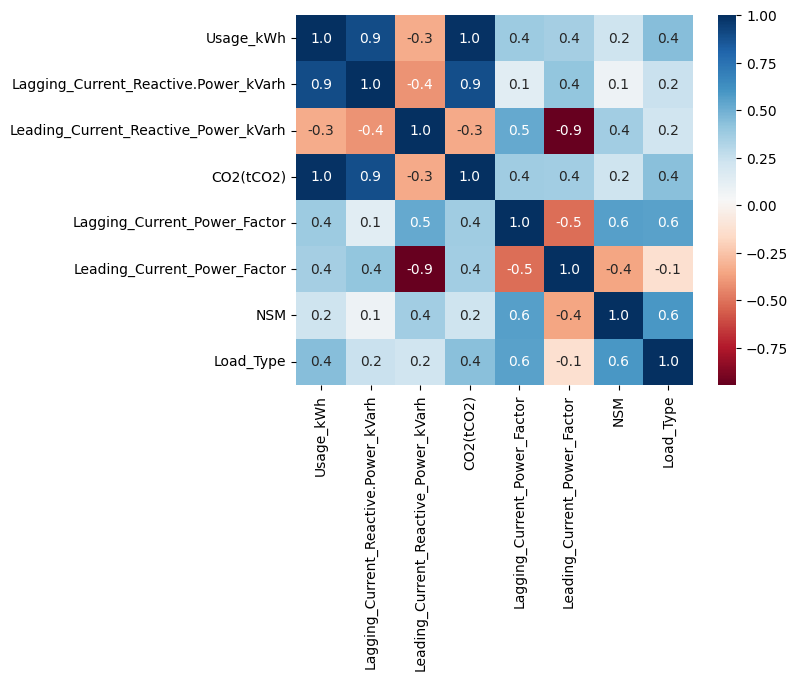

In [ ]:
sns.heatmap(df.corr(), cmap = ("RdBu"), annot=True, fmt=".1f")
plt.show()

In [ ]:
# Из основного набораудаляем столбец с целевой переменной
df = df.drop('Load_Type', axis=1)
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,3.17,2.95,0.00,0.0,73.21,100.00,900
1,4.00,4.46,0.00,0.0,66.77,100.00,1800
2,3.24,3.28,0.00,0.0,70.28,100.00,2700
3,3.31,3.56,0.00,0.0,68.09,100.00,3600
4,3.82,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...,...
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500
35039,3.67,3.02,0.07,0.0,77.22,99.98,0


In [ ]:
# Т.к. столбец Leading_Current_Power_Factor очень слабо коррелирует с целевой переменной,мы можем еге удалить из основного набора
df = df.drop('Leading_Current_Power_Factor', axis=1)

In [ ]:
# Разбиваем признаки и вектор целевой переменной на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)


In [ ]:
# Обучаем модель
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)

In [ ]:
knn_predictions = knn.predict(X_test)
knn_predictions

array([2, 0, 2, ..., 0, 2, 1])

In [ ]:
# Для проверки импортируем простую встроенную метрику accuracy_score,
# которая определяет долю правильных ответов.

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.878987608752966


In [ ]:
from joblib import dump, load # Для сохранения модели

In [ ]:
# dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']